In [ ]:
#%matplotlib notebook

## Analizar output.nc

In [1]:
# modulos para analizar los datos
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [3]:
#archivo nc (grd) a cargar
nc_file=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\tst\out_03\layer01.nc"

direccion_actual=os.path.dirname(nc_file)
nombre_archivo=os.path.splitext(os.path.basename(nc_file))[0]

os.mkdir(direccion_actual+"//eta")

# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

KeysView(<xarray.Dataset>
Dimensions:         (grid_lat: 1430, grid_lon: 564, lat: 1430, lon: 564, time: 61)
Coordinates:
  * lon             (lon) float64 285.6 285.6 285.6 285.6 ... 290.3 290.3 290.3
  * lat             (lat) float64 -37.43 -37.42 -37.41 ... -25.54 -25.53 -25.52
  * grid_lon        (grid_lon) float64 285.6 285.6 285.6 ... 290.3 290.3 290.3
  * grid_lat        (grid_lat) float64 -37.43 -37.42 -37.41 ... -25.53 -25.52
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-01T01:00:00....
Data variables:
    original_bathy  (grid_lat, grid_lon) float64 ...
    deformed_bathy  (grid_lat, grid_lon) float64 ...
    max_height      (lat, lon) float64 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          TsunamiHySEA model output
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    references:                     http://path

C:\ProgramData\Miniconda3\lib\site-packages\xarray\plot\plot.py:905: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.imshow(z, **defaults)


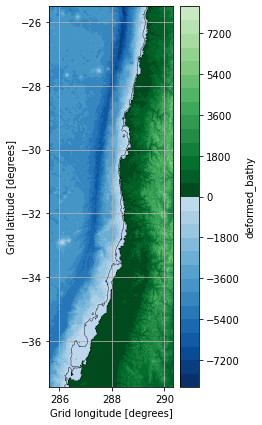

In [4]:
#Plotear deformed_bathy
variable=data_nc.deformed_bathy

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

(variable*-1).plot.imshow(aspect=ds.dims['lon'] / ds.dims['lat'],size=7
                            ,cmap=cmap, levels=30
                           )
                          #,cmap=cmap,norm=divnorm)   #variable de interes
variable.plot.contour(levels=[0,200], colors='k',linewidths=0.4)      #curva de nivel 0 y 200m
plt.grid()

nombre_variable=variable.name
#plt.savefig(direccion_actual+'//'+nombre_archivo+'_'+nombre_variable+'.png',dpi=300,bbox_inches = 'tight')

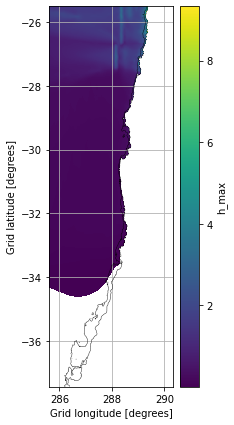

In [5]:
#plotear max_height

mask_mar=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy<=0))
mask_tierra=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy>0))

p_mar=mask_mar*data_nc.max_height.values
p_tierra=mask_tierra*(data_nc.max_height.values+data_nc.deformed_bathy.values)

hmax=p_mar+p_tierra
hmax.values[hmax==0]=['nan']
#data_nc = data_nc.merge(d_max)

hmax.rename("h_max").plot.imshow(aspect=ds.dims['lon'] / ds.dims['lat'],size=7)

im=data_nc.deformed_bathy.plot.contour(levels=[0,200], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.grid()

nombre_variable="max_height"
#plt.savefig(direccion_actual+'//'+nombre_archivo+'_'+nombre_variable+'.png',dpi=300)

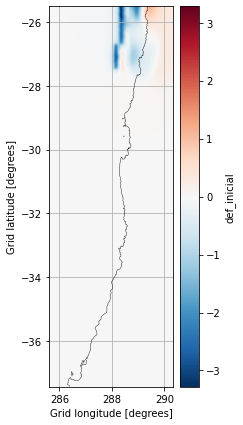

In [8]:
#Plotear deformacion inicial
variable=data_nc.deformed_bathy-data_nc.original_bathy
vmax=max(np.abs(variable.values.min()),variable.values.max())

#divnorm = cm.colors.DivergingNorm(vmin=-vmax,vcenter=0,vmax=vmax)

variable.rename("def_inicial").plot.imshow(
                                aspect=ds.dims['lon'] / ds.dims['lat'],size=7
                                #,cmap='seismic',norm=divnorm
                                )   #variable de interes
data_nc.deformed_bathy.plot.contour(levels=[0], colors='k',linewidths=0.4)      #curva de nivel 0 y 200m
plt.grid()

nombre_variable="deformacion_inicial"

plt.savefig(direccion_actual+'//'+nombre_archivo+'_'+nombre_variable+'.png',dpi=300,bbox_inches = 'tight')

In [ ]:
#plotear eta en un tiempo dado
tiempo=9

mask_mar=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy<=0))
mask_tierra=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy>0))

p_mar=mask_mar*data_nc.max_height.values
p_tierra=mask_tierra*(data_nc.eta.isel(time=tiempo).values+data_nc.deformed_bathy.values)

hmax=p_mar+p_tierra
hmax.values[hmax==0]=['nan']

hmax.rename("eta").plot.imshow(aspect=ds.dims['lon'] / ds.dims['lat'],size=7)

data_nc.deformed_bathy.plot.contour(levels=[0,200], colors='k',linewidths=0.4)      #curva de nivel 0 y 200m
plt.grid()

nombre_variable='eta_'+str(tiempo)

plt.savefig(direccion_actual+'//'+nombre_archivo+'_'+nombre_variable+'.png',dpi=300)

In [ ]:
#Plotear todos los eta

divnorm = cm.colors.DivergingNorm(vmin=-40,vcenter=0,vmax=40)

j=0
for i in data_nc.eta.time.values:
    mask_mar=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy<=0))
    mask_tierra=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy>0))

    p_mar=mask_mar*data_nc.eta.isel(time=j).values
    p_tierra=mask_tierra*(data_nc.eta.isel(time=j).values+data_nc.deformed_bathy.values)

    hmax=p_mar+p_tierra
    hmax.values[hmax==0]=['nan']
    hmax.rename('eta_'+str(j)).plot.imshow(aspect=ds.dims['lon'] / ds.dims['lat'],size=7,cmap="coolwarm",norm=divnorm)
    data_nc.deformed_bathy.plot.contour(levels=[0,200], colors='k',linewidths=0.4)      #curva de nivel 0 y 200m
    plt.grid()
    
    nombre_variable='eta_'+str(j).zfill(2)
    plt.savefig(direccion_actual+'//eta//'+nombre_archivo+'_'+nombre_variable+'.png',dpi=100)
    plt.close()
    j=j+1

In [ ]:
#Genera gif
import imageio

png_dir = direccion_actual+"//eta"
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        print(file_name)
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(direccion_actual+'//'+"tst.gif", images,fps=5)

## Analizar boyas (serie de tiempo)

In [2]:
#Plotear info boyas
#archivo nc (grd) a cargar
nc_boya=r"Z:\00 Memoria\Modelos HySea\tarea01\modelos\mw_4l\4l_mw75\out_18000\layer01_ts.nc"

# ver contenidos archivo nc (grd)
data_boya=xr.open_dataset(nc_boya)

with data_boya as ds_b:
  print(ds_b.keys()) # muestra contenido del archivo .grd

KeysView(<xarray.Dataset>
Dimensions:         (grid_npoints: 11, time: 18020)
Coordinates:
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-01
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float64 ...
    longitude       (grid_npoints) float64 ...
    latitude        (grid_npoints) float64 ...
    min_height      (grid_npoints) float64 ...
    max_height      (grid_npoints) float64 ...
    eta             (time, grid_npoints) float64 ...
    ux              (time, grid_npoints) float64 ...
    uy              (time, grid_npoints) float64 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Time series output of TsunamiHySEA model
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    references:                     http://path.to.paper/paper.pdf
    history:                        

In [ ]:
grid

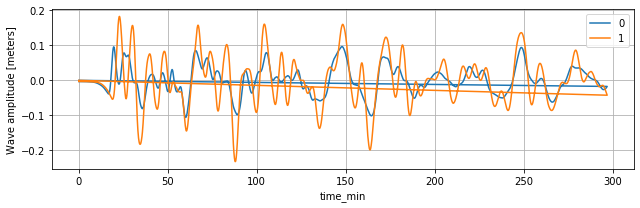

In [8]:
#agregar variable tiempo en minutos (time_min)
time_min=(data_boya.time-data_boya.time[0])/ pd.Timedelta("1m")
data_boya = data_boya.assign_coords(time_min=("time", time_min))

#boyas=data_boya.grid_npoints.values  #todas
boyas=[0,1] #las de la lista solamente (de 0 a nboyas)
data_boya.eta.isel(grid_npoints=boyas).plot.line(x='time_min',aspect=3,size=3)
plt.legend(boyas)
plt.tight_layout()
plt.grid()

In [ ]:
#plotea todas las boyas

## Pruebas

In [ ]:
list_variables=list(data_nc.keys())
i=0
for j in list_variables:
    i=i+1
    print('['+str(i)+']: '+str(j))

In [ ]:
hola='deformed_bathy'
data_nc.hola

In [ ]:
#plotea variable que se anote en z

z=data_bati.deformed_bathy-data_bati.original_bathy

z.plot.imshow( #tamaño de la imagen (pulgadas)
    aspect=ds.dims['lon'] / ds.dims['lat'], #aspect ratio, deja la escala horizontal igual a la vertical
size=5)

#z.plot.contour(levels=[0], colors='k',linewidths=0.4) #curva de nivel )

plt.tight_layout()
plt.grid()

In [ ]:
#archivo nc (grd) a cargar
nc_file=r"Z:\00 Memoria\Modelos HySea\Config1\bat_l0_gebco_30sa_chilecont_v2.grd"

# ver contenidos archivo nc (grd)
data_bati=xr.open_dataset(nc_file)

with data_bati as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

#plotea variable que se anote en z

z=data_bati.z

z.plot.imshow( #tamaño de la imagen (pulgadas)
    aspect=ds.dims['x'] / ds.dims['y'], #aspect ratio, deja la escala horizontal igual a la vertical
size=5)

z.plot.contour(levels=[0], colors='k',linewidths=0.4) #curva de nivel )

plt.tight_layout()
plt.grid()

In [ ]:
#archivo nc (grd) a cargar
nc_file=r"Z:\00 Memoria\Modelos HySea\Config1\bat_l0_gebco_30sa_chilecont_v2.grd"

# ver contenidos archivo nc (grd)
data_bati=xr.open_dataset(nc_file)

with data_bati as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

#plotea variable que se anote en z

z=data_bati.z

z.plot.imshow( #tamaño de la imagen (pulgadas)
    aspect=ds.dims['x'] / ds.dims['y'], #aspect ratio, deja la escala horizontal igual a la vertical
size=5)

z.plot.contour(levels=[0], colors='k',linewidths=0.4) #curva de nivel )

plt.tight_layout()
plt.grid()

In [ ]:
#archivo nc (grd) a cargar
def_file=r"Z:\00 Memoria\HySea - Modelos\ejemplo_chile_1l\ejemplo_chile\def_2015.grd"

# ver contenidos archivo nc (grd)
data_def=xr.open_dataset(def_file)

with data_def as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

In [ ]:
#no esta terminado

import sys
sys.stdout = open(1, 'w')  #muestra en la ventana de comandos los click

fig, axes = plt.subplots()    
    
data_def.z.plot.imshow(
    #size=5 #tamaño de la imagen (pulgadas)
    #,aspect=ds.dims['x'] / ds.dims['y'] #aspect ratio, aqui la escala horizontal queda igual a la vertic)
    ax=axes
)
data_bati.z.plot.contour(levels=[0], colors='k',linewidths=0.4,ax=axes) #curva de nivel

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.grid()
plt.tight_layout()
axes.axis("scaled")
plt.show()

In [ ]:
data_nc.deformed_bathy.where(data_nc.deformed_bathy>0).plot.imshow(cmap='Blues')

In [ ]:
data_nc.deformed_bathy.where(data_nc.deformed_bathy<=0).plot.imshow(cmap='Greens')

In [ ]:
mask_tierra=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy>0))
mask_tierra.plot()

In [ ]:
mask_mar=np.isnan(data_nc.deformed_bathy.where(data_nc.deformed_bathy<=0))
mask_mar.plot()

In [ ]:
p_tierra=mask_tierra*(data_nc.max_height.values+data_nc.deformed_bathy.values)
p_tierra.plot.imshow()

In [ ]:
p_mar=mask_mar*data_nc.max_height.values
p_mar.plot.imshow()

In [ ]:
hmax=p_mar+p_tierra
hmax.values[hmax==0]=['nan']
hmax.plot.imshow()

In [ ]:
data_nc.deformed_bathy.plot()

In [ ]:
import imageio

In [ ]:
import os
import imageio

png_dir = direccion_actual
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(direccion_actual+'//'+"tst.gif", images)

In [ ]:
conda install imageio-ffmpeg

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\madia\Desktop\4l_r\c\y2C_85.txt")
df.head(2).to_csv(r"C:\Users\madia\Desktop\4l_r\c\y2C_85.txt")